In [49]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import graphviz 
from sklearn import tree
import statsmodels.api as sm
import seaborn as sns; sns.set()


In [22]:
#Read in necessary data sets
#Number of students who received a certain type of discipline by district
disc = pd.read_csv(r'../Data/Florida data/FLDOE/Discipline/Discipline Concatenated.csv', index_col=0)
disc.head()

,District,Total Discipline,Year
0,ALACHUA,5791.0,2009
1,BAKER,625.0,2009
2,BAY,4970.0,2009
3,BRADFORD,1054.0,2009
4,BREVARD,10713.0,2009


In [23]:
#School grades by district
grades = pd.read_csv(r'../Data/Florida data/FLDOE/District Grades/Grades Concatenated.csv', index_col=0)
grades.head()

,District Number,District Name,Grade 2018,Grade 2017,Grade 2016,Informational Baseline Grade 2015,Grade 2014,Grade 2013,Grade 2012,Grade 2011,Grade 2010,Grade 2009,Grade 2008,Grade 2007,Grade 2006,Grade 2005,Grade 2004
0,1,ALACHUA,B,B,B,A,C,C,B,A,A,A,A,A,A,B,B
1,2,BAKER,B,B,C,B,C,C,C,B,B,B,B,C,C,C,C
2,3,BAY,B,B,B,B,C,C,B,A,B,A,A,B,A,B,B
3,4,BRADFORD,C,C,C,C,C,D,D,C,C,C,C,C,C,C,C
4,5,BREVARD,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A


In [24]:
#Create new data frame in the format needed to merge all three data sets
df = pd.DataFrame(columns=['District', 'Year', 'Grade'])


In [25]:
#fill in the new data frame

for column in grades:
    for x in range(2004,2019):
        if column[-4:]== str(x):
            for index,row in grades.iterrows():
                df = df.append({'Year': x, 'District': row['District Name'], 'Grade': row[column]}, ignore_index=True)

df.head()

,District,Year,Grade
0,ALACHUA,2018,B
1,BAKER,2018,B
2,BAY,2018,B
3,BRADFORD,2018,C
4,BREVARD,2018,A


In [26]:
df['Year']=df['Year'].apply(int)

finaldf= df.merge(disc, on=["District", "Year"])
finaldf.head()

,District,Year,Grade,Total Discipline
0,HILLSBOROUGH,2017,B,29667.0
1,INDIAN RIVER,2017,B,2204.0
2,HILLSBOROUGH,2016,B,30899.0
3,INDIAN RIVER,2016,B,2386.0
4,ALACHUA,2015,A,1972.0


In [27]:
#Read District finances + juvenile crime rate merged dataset
fund = pd.read_csv(r'../Data/Florida data/merged_datasets/juvenile_crime_vs_finances.csv', index_col=0)
fund.head()

,COUNTY NAME,Year,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,TOTAL ARRESTS,JUVENILE POP,CRIME RATE
0,Alachua,2016,9.702167,1.270125,4.333970,4.098072,9.340386,4.968435,3.352738,0.626344,0.328715,730,47667,1.531458
1,Baker,2016,8.530388,0.965414,6.065374,1.499600,8.362055,4.367453,3.266693,0.565974,0.145542,77,6877,1.119674
2,Bay,2016,9.979338,0.934416,3.981534,5.063389,9.527591,5.411936,2.667003,0.541305,0.797883,1234,39597,3.116398
3,Bradford,2016,10.011229,1.574860,5.697130,2.739239,9.352776,5.072052,3.243606,0.945415,0.083593,60,5393,1.112553
4,Brevard,2016,9.968929,1.037302,4.560299,4.371328,9.390130,5.292529,2.829184,0.455725,0.526518,2250,107226,2.098372


In [28]:
#Rename column
fund.rename(columns = {'COUNTY NAME':'District'}, inplace = True)
#Uppercase District column
fund['District'] = fund['District'].str.upper()
fund.head()


,District,Year,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,TOTAL ARRESTS,JUVENILE POP,CRIME RATE
0,ALACHUA,2016,9.702167,1.270125,4.333970,4.098072,9.340386,4.968435,3.352738,0.626344,0.328715,730,47667,1.531458
1,BAKER,2016,8.530388,0.965414,6.065374,1.499600,8.362055,4.367453,3.266693,0.565974,0.145542,77,6877,1.119674
2,BAY,2016,9.979338,0.934416,3.981534,5.063389,9.527591,5.411936,2.667003,0.541305,0.797883,1234,39597,3.116398
3,BRADFORD,2016,10.011229,1.574860,5.697130,2.739239,9.352776,5.072052,3.243606,0.945415,0.083593,60,5393,1.112553
4,BREVARD,2016,9.968929,1.037302,4.560299,4.371328,9.390130,5.292529,2.829184,0.455725,0.526518,2250,107226,2.098372


In [29]:
Merged_DF= fund.merge(finaldf,on= ['District', 'Year'])
Merged_DF.head()

,District,Year,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,TOTAL ARRESTS,JUVENILE POP,CRIME RATE,Grade,Total Discipline
0,HILLSBOROUGH,2016,9.901511,1.455373,4.991525,3.454613,10.253649,5.530207,2.932395,1.061683,0.544858,5800,317391,1.827399,B,30899.0
1,ALACHUA,2013,9.030259,1.249155,3.661072,4.120032,9.228024,4.746173,3.419284,0.578560,0.374721,1068,45383,2.353304,C,2458.0
2,BAKER,2013,8.153954,0.847451,5.535929,1.770574,8.243677,4.432156,3.094741,0.509233,0.178041,42,6763,0.621026,C,984.0
3,BAY,2013,8.958737,0.954382,3.050800,4.953556,8.557483,4.937448,2.346474,0.592213,0.503229,1313,37672,3.485347,C,5062.0
4,BRADFORD,2013,8.993588,1.355725,4.763664,2.874198,9.703817,5.070534,3.366107,0.941679,0.320000,52,5496,0.946143,D,920.0


In [30]:
Merged_DF.isna().sum()

District            0
Year                0
TOTALREV            0
TFEDREV             0
TSTREV              0
TLOCREV             0
TOTALEXP            0
TCURINST            0
TCURSSVC            0
TCURONON            0
TCAPOUT             0
TOTAL ARRESTS       0
JUVENILE POP        0
CRIME RATE          0
Grade               0
Total Discipline    0
dtype: int64

In [31]:
#transform data set since sklearn does not accept features in categorical data

Merged_DF = Merged_DF.replace({'Grade': {'A': 1, 'B': 2, 'C':3, 'D':4, 'F':5}})
Merged_DF.head()

,District,Year,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,TOTAL ARRESTS,JUVENILE POP,CRIME RATE,Grade,Total Discipline
0,HILLSBOROUGH,2016,9.901511,1.455373,4.991525,3.454613,10.253649,5.530207,2.932395,1.061683,0.544858,5800,317391,1.827399,2,30899.0
1,ALACHUA,2013,9.030259,1.249155,3.661072,4.120032,9.228024,4.746173,3.419284,0.578560,0.374721,1068,45383,2.353304,3,2458.0
2,BAKER,2013,8.153954,0.847451,5.535929,1.770574,8.243677,4.432156,3.094741,0.509233,0.178041,42,6763,0.621026,3,984.0
3,BAY,2013,8.958737,0.954382,3.050800,4.953556,8.557483,4.937448,2.346474,0.592213,0.503229,1313,37672,3.485347,3,5062.0
4,BRADFORD,2013,8.993588,1.355725,4.763664,2.874198,9.703817,5.070534,3.366107,0.941679,0.320000,52,5496,0.946143,4,920.0


In [32]:
list(Merged_DF)

['District',
 'Year',
 'TOTALREV',
 'TFEDREV',
 'TSTREV',
 'TLOCREV',
 'TOTALEXP',
 'TCURINST',
 'TCURSSVC',
 'TCURONON',
 'TCAPOUT',
 'TOTAL ARRESTS',
 'JUVENILE POP',
 'CRIME RATE',
 'Grade',
 'Total Discipline']

In [48]:
#Create a decision Tree and calculate the score


cols= ['Year',
 'Grade',
'Total Discipline']

features = Merged_DF[cols]

target = Merged_DF['TOTALREV']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
regressor = DecisionTreeRegressor(random_state=0, min_samples_leaf=5, max_depth=3)
model = regressor.fit(X_train, y_train)

print("Score:" + str(model.score(X_test, y_test)))

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))




Score:0.03943010429749316
RMSE:1.550013619694223


C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


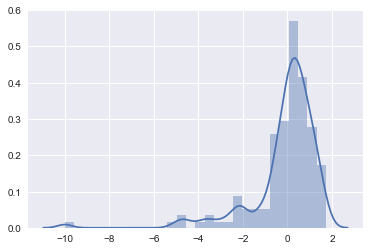

In [50]:
residuals = predictions - y_test

sns.distplot(residuals)

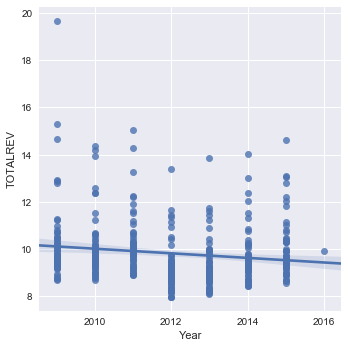

In [53]:
sns.lmplot(x = "Year", y = "TOTALREV", data = Merged_DF).set(xticks= [2010, 2012, 2014, 2016])

In [54]:
#Identify the outlier

print(Merged_DF.loc[Merged_DF['TOTALREV'] > 16])

    District  Year   TOTALREV   TFEDREV     TSTREV   TLOCREV   TOTALEXP  \
393  LIBERTY  2009  19.678571  1.904987  15.865903  1.907682  18.942049   

     TCURINST  TCURSSVC  TCURONON   TCAPOUT  TOTAL ARRESTS  JUVENILE POP  \
393  5.577493  3.530323  1.174528  8.645553              7          1763   

     CRIME RATE  Grade  Total Discipline  
393     0.39705      3             170.0  


In [43]:

dot_data = tree.export_graphviz(model, out_file=None, feature_names=list(X_train)) 

graph = graphviz.Source(dot_data) 

#graph.render("disc_grades_tree2") 

In [66]:
#Fit linear model 

cols= ['Year',
 'Grade',
'Total Discipline']

features = Merged_DF[cols]

target = Merged_DF['TOTALREV']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test) # make the predictions by the model

rmse = sqrt(mean_squared_error(y_test, predictions))


print("RMSE:" + str(rmse))

model.summary()

RMSE:1.550013619694223


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOTALREV   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     6431.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          5.39e-255
Time:                        01:29:52   Log-Likelihood:                -439.59
No. Observations:                 279   AIC:                             885.2
Df Residuals:                     276   BIC:                             896.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                 0.0051   9.24e-05     54.998      0.000       0.005       0.005
Grade               -0.1739      0.074     -2.337      0.020      -0.320      -0.027
Total Discipline -1.283e-05    7.9e-06     -1.624      0.106   -2.84e-05    2.72e-06
==============================================================================
Omnibus:                      100.641   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.837
Skew:                           1.636   Prob(JB):                     1.16e-63
Kurtosis:                       6.772   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#Fit linear model without Discipline

cols= ['Year',
      'Grade']

features = Merged_DF[cols]

target = Merged_DF['TOTALREV']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test) # make the predictions by the model

rmse = sqrt(mean_squared_error(y_test, predictions))


print("RMSE:" + str(rmse))

model.summary()

RMSE:1.5598402681378845


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOTALREV   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     9588.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.81e-256
Time:                        01:52:23   Log-Likelihood:                -440.92
No. Observations:                 279   AIC:                             885.8
Df Residuals:                     277   BIC:                             893.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0050   8.57e-05     58.660      0.000       0.005       0.005
Grade         -0.1565      0.074     -2.119      0.035      -0.302      -0.011
==============================================================================
Omnibus:                      107.603   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.698
Skew:                           1.732   Prob(JB):                     4.21e-72
Kurtosis:                       7.034   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


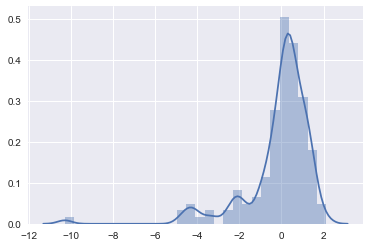

In [72]:
#Create histogram of residuals

residuals =predictions - y_test

sns.distplot(residuals)

In [61]:
#Fit Mixed Linear Model 

cols= [
     'Year',
     'Grade',
     'Total Discipline',
     'District']


X = Merged_DF[cols]
y = Merged_DF["TOTALREV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


groups = X_train["District"]

cols_model = [
     'Year',
     'Grade',
     'Total Discipline']

model = sm.MixedLM(endog=y_train, exog=X_train[cols_model], groups=groups).fit()

predictions = model.predict(X_test[cols_model]) # make the predictions by the model

rmse = sqrt(mean_squared_error(y_test, predictions))


print("RMSE:" + str(rmse))

model.summary()



RMSE:1.6106982826679157


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:              MixedLM  Dependent Variable:  TOTALREV 
No. Observations:   279      Method:              REML     
No. Groups:         60       Scale:               0.2580   
Min. group size:    2        Likelihood:          -321.5644
Max. group size:    7        Converged:           Yes      
Mean group size:    4.7                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Year              0.005    0.000 49.666 0.000  0.005  0.006
Grade            -0.464    0.055 -8.421 0.000 -0.573 -0.356
Total Discipline -0.000    0.000 -0.309 0.757 -0.000  0.000
Group Var         1.327    0.579                           
===========================================================

"""

In [68]:
#Fit Mixed Linear Model without discipline

cols= [
     'Year',
     'Grade',
     'District']


X = Merged_DF[cols]
y = Merged_DF["TOTALREV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


groups = X_train["District"]

cols_model = [
     'Year',
     'Grade']

model = sm.MixedLM(endog=y_train, exog=X_train[cols_model], groups=groups).fit()

predictions = model.predict(X_test[cols_model]) # make the predictions by the model

rmse = sqrt(mean_squared_error(y_test, predictions))


print("RMSE:" + str(rmse))

model.summary()



RMSE:1.6148088101340459


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TOTALREV 
No. Observations: 279     Method:             REML     
No. Groups:       60      Scale:              0.2572   
Min. group size:  2       Likelihood:         -311.3255
Max. group size:  7       Converged:          Yes      
Mean group size:  4.7                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Year          0.005    0.000 56.601 0.000  0.005  0.006
Grade        -0.461    0.054 -8.501 0.000 -0.568 -0.355
Group Var     1.322    0.573                           
=======================================================

"""

C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


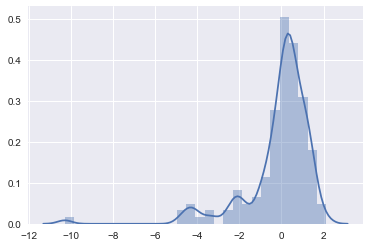

In [69]:
residuals = predictions - y_test

sns.distplot(residuals)